## problem 30

In [2]:
data = None
with open('alice/alice.txt.conll') as infile:
    data = infile.readlines()

tkn_fields = ['text', 'lemma', 'pos']

sents = []
sent_tokens = []
for line in data:
    if line.strip()=='':
        if len(sent_tokens)>0:
            sents.append(sent_tokens)
            sent_tokens = []
        continue
    line_split = line.split('\t')
    token_info = {tkn_fields[i]: line_split[i+1] for i in range(3)}
    sent_tokens.append(token_info)

sents[0]

[{'text': 'ALICE', 'lemma': 'ALICE', 'pos': 'NNP'},
 {'text': "'S", 'lemma': "'s", 'pos': 'POS'},
 {'text': 'ADVENTURES', 'lemma': 'ADVENTURES', 'pos': 'NNP'},
 {'text': 'IN', 'lemma': 'in', 'pos': 'IN'},
 {'text': 'WONDERLAND', 'lemma': 'WONDERLAND', 'pos': 'NNP'}]

## problem 31

In [3]:
verb_pos = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
verbs_surface = []
verbs_lemma = []

for sent_tokens in sents:
    for token in sent_tokens:
        if token['pos'].strip() in verb_pos:
            verbs_surface.append(token['text'])
            verbs_lemma.append(token['lemma'])
            
print(verbs_surface[:5], len(verbs_surface))
print(verbs_lemma[:5], len(verbs_lemma))

['was', 'beginning', 'get', 'sitting', 'having'] 5722
['be', 'begin', 'get', 'sit', 'have'] 5722


## problem 32

In [4]:
match_phrases = []
noun_pos = ['NN', 'NNP', 'NNPS', 'NNS']
for i in range(len(sents)):
    for j in range(1, len(sents[i])-1):
        if sents[i][j]['lemma'] == 'of':
            if not sents[i][j-1]['pos'] in noun_pos:
                continue
            A = sents[i][j-1]['text']
            if not sents[i][j+1]['pos'] in noun_pos:
                continue
            B = sents[i][j+1]['text']
            match_phrases.append([sents[i][j-1], sents[i][j], sents[i][j+1], A + ' of ' + B])

print(len(match_phrases))
_, _, _, d = zip(*match_phrases)
print(*d[:5], sep='\n')

111
OUT of ITS
plenty of time
saucer of milk
sort of way
heap of sticks


In [5]:
names = ['alice'+str(i) for i in range(10)]
ids = ['202105'+str(i) for i in range(10)]
grades = [90+i for i in range(10)]

## problem 33

In [6]:
noun_phrases = []
longest_phrase = ''
length = float('-inf')
noun_pos = ['NN', 'NNP', 'NNPS', 'NNS']
for i in range(len(sents)):
    for j in range(len(sents[i])-1):
            if not sents[i][j]['pos'] in noun_pos:
                continue
            A = sents[i][j]['text']
            if not sents[i][j+1]['pos'] in noun_pos:
                continue
            B = sents[i][j+1]['text']
            leng_phrase = len(A)+len(B)
            if leng_phrase > length:
                length = leng_phrase
                longest_phrase = A + ' ' + B
            noun_phrases.append([sents[i][j], sents[i][j+1], A + ' ' + B])
print(len(noun_phrases))
_, _, d = zip(*noun_phrases)
print(*d[:5], sep='\n')
longest_phrase

245
Lewis Carroll
MILLENNIUM FULCRUM
FULCRUM EDITION
CHAPTER I.
White Rabbit


'ITS WAISTCOAT-POCKET'

## problem 35

In [7]:
from collections import Counter
punct = ["''", ',', '-LRB-', '-RRB-', '.', ':', '``']
all_words = []
for i in sents:
    for j in i:
        if j['pos'] not in punct:
            all_words.append(j['text'])
word_count = Counter(all_words)
print(word_count.most_common(10))

[('the', 1522), ('and', 796), ('to', 721), ('a', 614), ('I', 544), ('it', 527), ('she', 509), ('of', 497), ('said', 456), ('Alice', 395)]


In [8]:
from collections import defaultdict

all_words = []
dic_ = defaultdict(int)
for i in sents:
    for j in i:
        if j['pos'] not in punct:
            dic_[j['text']] += 1
# dic_

## problem 36

Counter({'the': 1522, 'and': 796, 'to': 721, 'a': 614, 'I': 544, 'it': 527, 'she': 509, 'of': 497, 'said': 456, 'Alice': 395, 'was': 363, 'in': 354, 'you': 345, 'that': 275, 'as': 246, 'her': 243, "n't": 216, 'at': 202, "'s": 194, 'on': 189, 'had': 184, 'with': 176, 'all': 173, 'be': 145, 'for': 140, 'but': 133, 'not': 130, 'they': 129, 'very': 126, 'little': 125, 'so': 124, 'do': 119, 'this': 113, 'out': 112, 'The': 108, 'is': 106, 'he': 101, 'down': 99, 'up': 96, 'about': 94, 'one': 94, 'his': 94, 'what': 93, 'them': 88, 'were': 86, 'know': 86, 'like': 84, 'went': 83, 'again': 83, 'herself': 83, 'could': 82, 'would': 82, 'have': 81, 'if': 78, 'or': 76, 'thought': 74, 'did': 74, 'Queen': 74, 'then': 72, 'no': 69, 'when': 69, 'into': 67, 'And': 67, 'see': 66, 'time': 65, 'there': 65, 'It': 64, 'off': 62, 'me': 61, 'King': 61, '*': 60, 'Turtle': 59, 'began': 58, "'m": 57, "'ll": 56, 'its': 56, 'Mock': 56, 'my': 55, 'Hatter': 55, 'Gryphon': 55, 'by': 54, 'way': 53, 'quite': 53, 'your': 5

<BarContainer object of 10 artists>

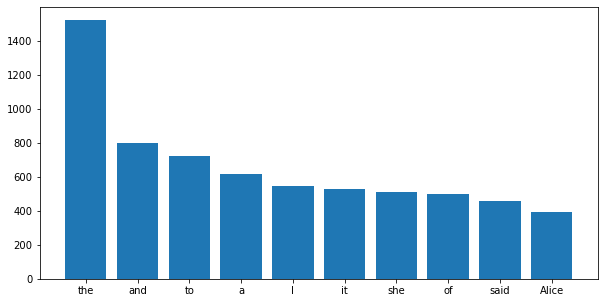

In [271]:
import matplotlib.pyplot as plt
top_words, top_count = zip(*word_count.most_common(10))
top_words = list(top_words)
top_count = list(top_count)

x = range(1, 11)
plt.figure(figsize=(10, 5))
plt.bar(x, top_count, tick_label=top_words, align="center")

## problem 37

<BarContainer object of 10 artists>

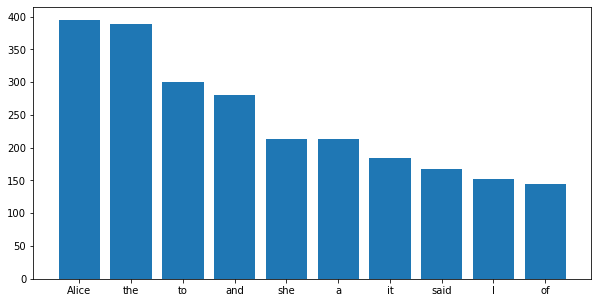

In [258]:
query_word = 'Alice'
co_occuring = []
for i in sents:
    sent_words = [w['text'] for w in i if w['pos'] not in punct]
    if query_word in sent_words:
        co_occuring.extend(sent_words)

top_qwords, top_qcount = zip(*Counter(co_occuring).most_common(10))
plt.figure(figsize=(10, 5))
plt.bar(range(1, 11), top_qcount, tick_label=top_qwords, align="center")

## problem 38

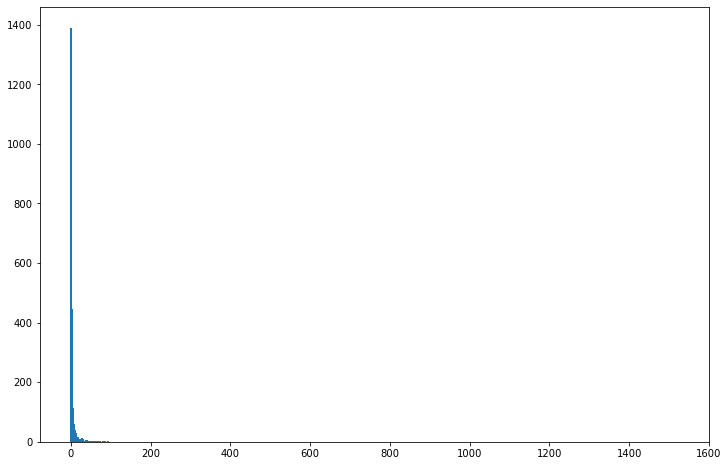

In [267]:
unique_counts = Counter(list(word_count.values()))
highest_frequency = max(list(unique_counts))
x, y = zip(*sorted(unique_counts.items(), key= lambda a: a[0]))


plt.figure(figsize=(12, 8))
plt.bar(list(x), list(y), width=5)
plt.show()

# plt.figure(figsize=(10, 8))
# plt.hist(list(word_count.values()), bins=1500)
# plt.show()

## problem 39

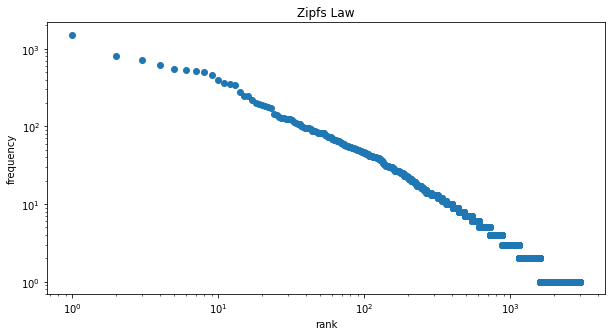

In [270]:
_, counts = zip(*word_count.most_common())
counts = list(counts)
plt.figure(figsize=(10, 5))
plt.xscale('log')
plt.yscale('log')
plt.title('Zipfs Law')
plt.scatter(range(1, len(counts)+1), counts)
plt.xlabel('rank')
plt.ylabel('frequency')
plt.show()